<H1>Introduction</H1>
<p>This notebook aims to anlyze the data from the Holy city of Varanasi for various resturants extracted via the zomato API. the notebook to extract the data can be found in the <a href="https://github.com/sukantoc/Coursera_Capstone/blob/master/Zomato_get_data_publish.ipynb">here</a>.<br>
The dataset is located <a href="https://github.com/sukantoc/Coursera_Capstone/blob/master/india_zomato.csv">here</a>.</p>

In [2]:
# importing required libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

#!pip install geopy  # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

#!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# libraries for scraping the data
#!pip install bs4
#!pip install lxml
from bs4 import BeautifulSoup
import lxml



print('Libraries imported.')

Libraries imported.


<h2> Importing the data from csv file</h2>

In [3]:
df_data_0 = pd.read_csv('india_zomato.csv')
df_data_0.head()

,restaurant_name,restaurant_rating,resturant_city,latitude,longitude,cost4two,cuisines,zipcode
0,Roma's Café Diner,4.8,Varanasi,25.281255,83.003285,800,"Continental, Cafe, North Indian, Italian, Asia...",221005
1,Shiraaz Biryani,4.8,Varanasi,25.325961,82.996392,400,Biryani,NaN
2,Kashi Chat Bhandar,4.7,Varanasi,25.309391,83.005948,150,Street Food,NaN
3,Barbeque Nation,4.7,Varanasi,25.335633,82.977597,1500,"North Indian, Chinese, BBQ",NaN
4,Deena Chat Bhandar,4.6,Varanasi,25.309139,83.002376,150,"Chinese, Street Food",221010


<p> Examining the data loaded </p>

In [4]:
df_data_0.groupby(df_data_0['resturant_city']).count()

,restaurant_name,restaurant_rating,latitude,longitude,cost4two,cuisines,zipcode
resturant_city,,,,,,,
Allahabad,100,100,100,100,100,100,29
Dhanbad,100,100,100,100,100,95,5
Gaya,100,100,100,100,100,99,6
Jamshedpur,100,100,100,100,100,100,16
Lucknow,100,100,100,100,100,100,59
Patna,100,100,100,100,100,100,29
Ranchi,100,100,100,100,100,100,21
Varanasi,100,100,100,100,100,100,25


In [5]:
df_data_0.shape

(800, 8)

In [7]:
df_data_0.describe()

,restaurant_rating,latitude,longitude,cost4two
count,800.000000,800.000000,800.000000,800.000000
mean,4.089625,24.300211,82.779249,496.862500
std,0.333795,3.474946,11.215398,385.277276
min,3.300000,0.000000,0.000000,0.000000
25%,3.900000,23.379821,81.860600,250.000000
50%,4.100000,24.801037,85.011590,400.000000
75%,4.300000,25.464704,85.384513,600.000000
max,4.900000,26.942639,86.475904,2800.000000


<p> Plotting the cities on Map</p>

In [13]:
city = df_data_0['resturant_city'].unique()

In [156]:
df_city = pd.DataFrame(columns={"resturant_city","latitude","longitude"})
for c in city:
    address= c
    geolocator = Nominatim(user_agent="explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    to_append = [address,latitude,longitude]
    city_series = pd.Series(to_append, index = {"resturant_city","latitude","longitude"})
    df_city = df_city. append({"resturant_city":address,"latitude":location.latitude,"longitude":location.longitude}, ignore_index=True)

df_city

The geograpical coordinate of Varanasi are 25.3356491, 83.0076292.
The geograpical coordinate of Patna are 25.6093239, 85.1235252.
The geograpical coordinate of Dhanbad are 23.7952809, 86.4309638.
The geograpical coordinate of Gaya are 24.7964355, 85.0079563.
The geograpical coordinate of Jamshedpur are 22.8015194, 86.2029579.
The geograpical coordinate of Allahabad are 25.4381302, 81.8338005.
The geograpical coordinate of Lucknow are 26.8381, 80.9346001.
The geograpical coordinate of Ranchi are 23.3700354, 85.3250132.


,resturant_city,longitude,latitude
0,Varanasi,83.007629,25.335649
1,Patna,85.123525,25.609324
2,Dhanbad,86.430964,23.795281
3,Gaya,85.007956,24.796436
4,Jamshedpur,86.202958,22.801519
5,Allahabad,81.833800,25.438130
6,Lucknow,80.934600,26.838100
7,Ranchi,85.325013,23.370035


<p> Plot the cities in a map</p>

In [163]:
#This is to create so that all points are visisble

address= "Sasaram"
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude_ctr = location.latitude
longitude_ctr = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude_ctr, longitude_ctr))





map1 = folium.Map(location=[latitude_ctr, longitude_ctr], zoom_start=7)

# add markers to the map
for lat, lon, poi in zip(df_city['latitude'], df_city['longitude'], df_city['resturant_city']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.Marker([lat, lon], popup= label,icon=folium.Icon(color='green')).add_to(map1)

    
map1


The geograpical coordinate of Sasaram are 24.9001003, 84.0182110684575.


<h3> Now we need to prepare our data for analysis</h3>

In [164]:
#splitting the cuisine column to multiple rows
df_data_1= df_data_0.set_index(['restaurant_name','resturant_city','restaurant_rating','latitude','longitude'
                   ,'cost4two','zipcode']).apply(lambda x: x.str.split(',').explode()).reset_index()

In [165]:
#replacing the zipcode NA values with "No Zip Code"
df_data_1["zipcode"].fillna("No ZipCode", inplace = True) 

In [166]:
#Removing leading and trailing spaces from the Cuisine values
df_data_1['cuisines']=df_data_1['cuisines'].str.strip()

In [167]:
print('There are {} uniques cuisine types.'.format(len(df_data_1['cuisines'].unique())))

There are 67 uniques cuisine types.


In [171]:
# one hot encoding
df_onehot = pd.get_dummies(df_data_1[['cuisines']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['resturant_city'] = df_data_1['resturant_city'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,resturant_city,Afghan,African,American,Arabian,Asian,Awadhi,BBQ,Bakery,Bar Food,Bengali,Beverages,Bihari,Biryani,Burger,Cafe,Cantonese,Charcoal Chicken,Chinese,Coffee,Continental,Cuisine Varies,Desserts,Drinks Only,European,Fast Food,Finger Food,German,Healthy Food,Hot dogs,Hyderabadi,Ice Cream,Indian,Italian,Japanese,Juices,Kebab,Lebanese,Lucknowi,Malaysian,Mediterranean,Mexican,Middle Eastern,Mishti,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Paan,Parsi,Pizza,Rajasthani,Roast Chicken,Rolls,Salad,Sandwich,Seafood,South Indian,Steak,Street Food,Sushi,Tea,Thai,Tibetan,Wraps
0,Varanasi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Varanasi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Varanasi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Varanasi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Varanasi,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df_onehot.shape

(2359, 67)

In [173]:
df_grouped = df_onehot.groupby('resturant_city').mean().reset_index()
df_grouped

,resturant_city,Afghan,African,American,Arabian,Asian,Awadhi,BBQ,Bakery,Bar Food,Bengali,Beverages,Bihari,Biryani,Burger,Cafe,Cantonese,Charcoal Chicken,Chinese,Coffee,Continental,Cuisine Varies,Desserts,Drinks Only,European,Fast Food,Finger Food,German,Healthy Food,Hot dogs,Hyderabadi,Ice Cream,Indian,Italian,Japanese,Juices,Kebab,Lebanese,Lucknowi,Malaysian,Mediterranean,Mexican,Middle Eastern,Mishti,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Paan,Parsi,Pizza,Rajasthani,Roast Chicken,Rolls,Salad,Sandwich,Seafood,South Indian,Steak,Street Food,Sushi,Tea,Thai,Tibetan,Wraps
0,Allahabad,0.000000,0.000000,0.000000,0.000000,0.003876,0.000000,0.000000,0.007752,0.000000,0.000000,0.065891,0.000000,0.015504,0.027132,0.034884,0.000000,0.000000,0.127907,0.003876,0.062016,0.000000,0.062016,0.000000,0.000000,0.120155,0.000000,0.000000,0.003876,0.000000,0.000000,0.007752,0.003876,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003876,0.000000,0.000000,0.000000,0.019380,0.00,0.007752,0.027132,0.000000,0.182171,0.000000,0.000000,0.054264,0.000000,0.000000,0.015504,0.003876,0.019380,0.000000,0.069767,0.000000,0.015504,0.000000,0.000000,0.007752,0.000000,0.003876
1,Dhanbad,0.013216,0.004405,0.004405,0.004405,0.013216,0.008811,0.000000,0.017621,0.004405,0.004405,0.026432,0.022026,0.110132,0.004405,0.008811,0.000000,0.000000,0.154185,0.004405,0.013216,0.000000,0.026432,0.004405,0.000000,0.096916,0.000000,0.000000,0.004405,0.000000,0.000000,0.008811,0.017621,0.000000,0.000000,0.004405,0.022026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026432,0.00,0.008811,0.022026,0.000000,0.189427,0.000000,0.000000,0.008811,0.000000,0.000000,0.061674,0.000000,0.004405,0.013216,0.026432,0.000000,0.013216,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gaya,0.002941,0.000000,0.002941,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000,0.026471,0.011765,0.129412,0.008824,0.011765,0.000000,0.000000,0.185294,0.005882,0.005882,0.000000,0.050000,0.000000,0.000000,0.097059,0.000000,0.000000,0.000000,0.002941,0.017647,0.011765,0.011765,0.000000,0.002941,0.000000,0.008824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.026471,0.00,0.023529,0.020588,0.000000,0.158824,0.000000,0.000000,0.011765,0.000000,0.002941,0.044118,0.002941,0.011765,0.002941,0.055882,0.000000,0.005882,0.000000,0.000000,0.002941,0.002941,0.005882
3,Jamshedpur,0.003484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017422,0.006969,0.000000,0.048780,0.000000,0.062718,0.020906,0.010453,0.003484,0.003484,0.191638,0.020906,0.031359,0.006969,0.038328,0.006969,0.000000,0.031359,0.003484,0.000000,0.000000,0.000000,0.000000,0.017422,0.003484,0.024390,0.003484,0.003484,0.006969,0.000000,0.000000,0.003484,0.000000,0.006969,0.000000,0.000000,0.006969,0.00,0.000000,0.013937,0.000000,0.191638,0.003484,0.003484,0.041812,0.000000,0.000000,0.024390,0.000000,0.024390,0.003484,0.069686,0.003484,0.010453,0.000000,0.013937,0.006969,0.000000,0.003484
4,Lucknow,0.000000,0.000000,0.010000,0.000000,0.006667,0.020000,0.000000,0.043333,0.003333,0.000000,0.033333,0.000000,0.003333,0.023333,0.040000,0.000000,0.000000,0.116667,0.000000,0.076667,0.000000,0.053333,0.000000,0.003333,0.063333,0.006667,0.003333,0.006667,0.000000,0.003333,0.003333,0.000000,0.056667,0.003333,0.003333,0.003333,0.006667,0.020000,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000,0.01,0.006667,0.090000,0.003333,0.150000,0.000000,0.000000,0.020000,0.000000,0.000000,0.003333,0.003333,0.016667,0.000000,0.010000,0.000000,0.020000,0.003333,0.003333,0.006667,0.000000,0.010000
5,Patna,0.000000,0.000000,0.000000,0.000000,0.003571,0.003571,0.000000,0.025000,0.000000,0.000000,0.078571,0.000000,0.046429,0.007143,0.017857,0.000000,0.000000,0.175000,0.003571,0.035714,0.000000,0.035714,0.000000,0.003571,0.107143,0.003571,0.000000,0.000000,0.000000,0.000000,0.010714,0.000000,0.021429,0.003571,0.000000,0.003571,0.000000,0.000000,0.000000,0.000000,0.000000,0.003571,0.000000,0.04

In [174]:
df_grouped.shape

(8, 67)

In [268]:
num_top_cuisines = 5

for hood in df_grouped['resturant_city']:
    print('----{}----'.format(hood))
    temp = df_grouped[df_grouped['resturant_city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_cuisines))
    print('\n')

----Allahabad----
          venue  freq
0  North Indian  0.18
1       Chinese  0.13
2     Fast Food  0.12
3  South Indian  0.07
4     Beverages  0.07


----Dhanbad----
          venue  freq
0  North Indian  0.19
1       Chinese  0.15
2       Biryani  0.11
3     Fast Food  0.10
4         Rolls  0.06


----Gaya----
          venue  freq
0       Chinese  0.19
1  North Indian  0.16
2       Biryani  0.13
3     Fast Food  0.10
4  South Indian  0.06


----Jamshedpur----
          venue  freq
0       Chinese  0.19
1  North Indian  0.19
2  South Indian  0.07
3       Biryani  0.06
4     Beverages  0.05


----Lucknow----
          venue  freq
0  North Indian  0.15
1       Chinese  0.12
2       Mughlai  0.09
3   Continental  0.08
4       Italian  0.06


----Patna----
          venue  freq
0       Chinese  0.18
1  North Indian  0.17
2     Fast Food  0.11
3     Beverages  0.08
4       Biryani  0.05


----Ranchi----
          venue  freq
0  North Indian  0.16
1       Chinese  0.14
2       Biryani  0.

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the cuisines in descending order.

In [176]:
def return_most_common_cuisines(row, num_top_cuisines):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cuisines]

Now let's create the new dataframe and display the top 10 cusines for each city.

In [177]:
num_top_cuisines = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['resturant_city']
for ind in np.arange(num_top_cuisines):
    try:
        columns.append('{}{} Most Common Cuisine'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Cuisine'.format(ind+1))

# create a new dataframe
city_cuisine_sorted = pd.DataFrame(columns=columns)
city_cuisine_sorted['resturant_city'] = df_grouped['resturant_city']

for ind in np.arange(df_grouped.shape[0]):
    city_cuisine_sorted.iloc[ind, 1:] = return_most_common_cuisines(df_grouped.iloc[ind, :], num_top_cuisines)

city_cuisine_sorted.head()

,resturant_city,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
0,Allahabad,North Indian,Chinese,Fast Food,South Indian,Beverages,Desserts,Continental,Pizza,Cafe,Mughlai
1,Dhanbad,North Indian,Chinese,Biryani,Fast Food,Rolls,Desserts,Beverages,Mithai,South Indian,Mughlai
2,Gaya,Chinese,North Indian,Biryani,Fast Food,South Indian,Desserts,Rolls,Mithai,Beverages,Momos
3,Jamshedpur,Chinese,North Indian,South Indian,Biryani,Beverages,Pizza,Desserts,Continental,Fast Food,Sandwich
4,Lucknow,North Indian,Chinese,Mughlai,Continental,Fast Food,Italian,Desserts,Bakery,Cafe,Beverages


## 4. Cluster Cities

Run *k*-means to cluster the cities into 5 clusters.

In [178]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('resturant_city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 4, 0, 3, 1, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [179]:
# add clustering labels
city_cuisine_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df_city

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(city_cuisine_sorted.set_index('resturant_city'), on='resturant_city')

df_merged # check the last columns!

,resturant_city,longitude,latitude,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
0,Varanasi,83.007629,25.335649,3,North Indian,Chinese,Fast Food,South Indian,Continental,Mughlai,Desserts,Beverages,Cafe,Italian
1,Patna,85.123525,25.609324,3,Chinese,North Indian,Fast Food,Beverages,Biryani,Mughlai,Mithai,South Indian,Desserts,Momos
2,Dhanbad,86.430964,23.795281,2,North Indian,Chinese,Biryani,Fast Food,Rolls,Desserts,Beverages,Mithai,South Indian,Mughlai
3,Gaya,85.007956,24.796436,2,Chinese,North Indian,Biryani,Fast Food,South Indian,Desserts,Rolls,Mithai,Beverages,Momos
4,Jamshedpur,86.202958,22.801519,4,Chinese,North Indian,South Indian,Biryani,Beverages,Pizza,Desserts,Continental,Fast Food,Sandwich
5,Allahabad,81.833800,25.438130,3,North Indian,Chinese,Fast Food,South Indian,Beverages,Desserts,Continental,Pizza,Cafe,Mughlai
6,Lucknow,80.934600,26.838100,0,North Indian,Chinese,Mughlai,Continental,Fast Food,Italian,Desserts,Bakery,Cafe,Beverages
7,Ranchi,85.325013,23.370035,1,North Indian,Chinese,Biryani,Desserts,Beverages,Fast Food,Pizza,South Indian,Street Food,Burger


In [180]:
df_merged

,resturant_city,longitude,latitude,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
0,Varanasi,83.007629,25.335649,3,North Indian,Chinese,Fast Food,South Indian,Continental,Mughlai,Desserts,Beverages,Cafe,Italian
1,Patna,85.123525,25.609324,3,Chinese,North Indian,Fast Food,Beverages,Biryani,Mughlai,Mithai,South Indian,Desserts,Momos
2,Dhanbad,86.430964,23.795281,2,North Indian,Chinese,Biryani,Fast Food,Rolls,Desserts,Beverages,Mithai,South Indian,Mughlai
3,Gaya,85.007956,24.796436,2,Chinese,North Indian,Biryani,Fast Food,South Indian,Desserts,Rolls,Mithai,Beverages,Momos
4,Jamshedpur,86.202958,22.801519,4,Chinese,North Indian,South Indian,Biryani,Beverages,Pizza,Desserts,Continental,Fast Food,Sandwich
5,Allahabad,81.833800,25.438130,3,North Indian,Chinese,Fast Food,South Indian,Beverages,Desserts,Continental,Pizza,Cafe,Mughlai
6,Lucknow,80.934600,26.838100,0,North Indian,Chinese,Mughlai,Continental,Fast Food,Italian,Desserts,Bakery,Cafe,Beverages
7,Ranchi,85.325013,23.370035,1,North Indian,Chinese,Biryani,Desserts,Beverages,Fast Food,Pizza,South Indian,Street Food,Burger


Finally, let's visualize the resulting clusters

In [190]:
# create map

from ipykernel import kernelapp as app

map_clusters = folium.Map(location=[latitude_ctr, longitude_ctr], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['blue','dargreen','darkpurple','orange','darkblue']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['latitude'], df_merged['longitude'], df_merged['resturant_city'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker([lat, lon], popup= label,icon=folium.Icon(color=rainbow[cluster-1])).add_to(map_clusters)
       
map_clusters

c:\users\sukantochatterjee\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: color argument of Icon should be one of: {'blue', 'darkgreen', 'purple', 'lightred', 'gray', 'green', 'cadetblue', 'lightblue', 'darkpurple', 'beige', 'red', 'white', 'orange', 'lightgray', 'black', 'pink', 'darkred', 'lightgreen', 'darkblue'}.


## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating cuisine categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster

#### Cluster 1

In [191]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,longitude,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
6,80.9346,Chinese,Mughlai,Continental,Fast Food,Italian,Desserts,Bakery,Cafe,Beverages


#### Cluster 2

In [192]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,longitude,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
7,85.325013,Chinese,Biryani,Desserts,Beverages,Fast Food,Pizza,South Indian,Street Food,Burger


#### Cluster 3

In [193]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,longitude,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
2,86.430964,Chinese,Biryani,Fast Food,Rolls,Desserts,Beverages,Mithai,South Indian,Mughlai
3,85.007956,North Indian,Biryani,Fast Food,South Indian,Desserts,Rolls,Mithai,Beverages,Momos


#### Cluster 4

In [194]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,longitude,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
0,83.007629,Chinese,Fast Food,South Indian,Continental,Mughlai,Desserts,Beverages,Cafe,Italian
1,85.123525,North Indian,Fast Food,Beverages,Biryani,Mughlai,Mithai,South Indian,Desserts,Momos
5,81.833800,Chinese,Fast Food,South Indian,Beverages,Desserts,Continental,Pizza,Cafe,Mughlai


#### Cluster 5

In [195]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,longitude,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
4,86.202958,North Indian,South Indian,Biryani,Beverages,Pizza,Desserts,Continental,Fast Food,Sandwich


In [275]:
df_data_2 = df_data_1
df_data_2.drop(['restaurant_name','zipcode','latitude','longitude'], axis = 1,inplace=True) 

KeyError: "['restaurant_name' 'zipcode' 'latitude' 'longitude'] not found in axis"

In [276]:
x=pd.DataFrame(df_data_2.groupby(by=['resturant_city','cuisines']).mean().reset_index())

In [277]:
x

,resturant_city,cuisines,restaurant_rating,cost4two
0,Allahabad,Asian,4.200000,1600.000000
1,Allahabad,Bakery,4.250000,300.000000
2,Allahabad,Beverages,4.170588,402.941176
3,Allahabad,Biryani,4.150000,312.500000
4,Allahabad,Burger,4.214286,428.571429
5,Allahabad,Cafe,4.233333,538.888889
6,Allahabad,Chinese,4.100000,566.666667
7,Allahabad,Coffee,4.000000,500.000000
8,Allahabad,Continental,4.225000,628.125000
9,Allahabad,Desserts,4.281250,446.875000


In [278]:
y=pd.DataFrame(df_data_2.groupby(by=['resturant_city']).mean().reset_index())

In [279]:
y.set_index('resturant_city',inplace=True)

In [280]:
y

,restaurant_rating,cost4two
resturant_city,,
Allahabad,4.140698,490.000000
Dhanbad,3.723789,297.400881
Gaya,3.736471,304.029412
Jamshedpur,4.121603,456.794425
Lucknow,4.427667,912.166667
Patna,4.251786,543.928571
Ranchi,4.214796,575.382653
Varanasi,4.187273,607.272727


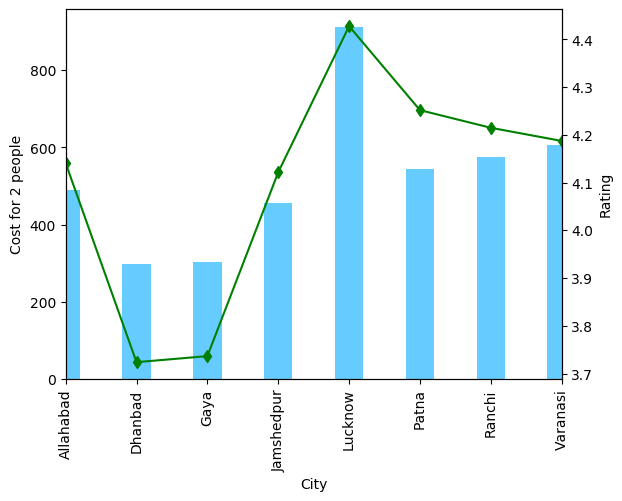

In [281]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

y['cost4two'].plot(kind='bar', color= '#66ccff', ax=ax, width=width)
y['restaurant_rating'].plot(kind='line', color='green',marker='d')

ax.set_ylabel('Cost for 2 people')
ax2.set_ylabel('Rating')
ax.set_xlabel('City')
plt.show()

In [329]:
num_top_cusines = 5
i=1
for c in x['resturant_city'].unique():
    temp_rating = x[x['resturant_city'] == c].nlargest(num_top_cusines,'restaurant_rating')
    temp_price = x[x['resturant_city'] == c].nlargest(num_top_cusines,'cost4two')
    if i==1:
        a_rating = temp_rating
        a_price = temp_price
    else :
        a_rating = a_rating.append(temp_rating)
        a_price = a_price.append(temp_price)
    
    i=i+1

In [331]:
a_rating

,resturant_city,cuisines,restaurant_rating,cost4two
15,Allahabad,Mediterranean,4.800000,1200.000000
26,Allahabad,Thai,4.300000,1300.000000
9,Allahabad,Desserts,4.281250,446.875000
1,Allahabad,Bakery,4.250000,300.000000
12,Allahabad,Ice Cream,4.250000,300.000000
59,Dhanbad,Sandwich,4.100000,250.000000
29,Dhanbad,African,4.000000,500.000000
30,Dhanbad,American,4.000000,500.000000
31,Dhanbad,Arabian,4.000000,500.000000
35,Dhanbad,Bar Food,4.000000,500.000000
